<a id="cont"></a>
## Table of Content

<a href=#one>1. Introduction</a>
       
<a href=#two>2. Importing Packages</a>

<a href=#three>3. Loading Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
<a href=#five>5. Data Processing</a>

<a href=#seven>6. Modelling</a>

<a href=#eight>7. Model Performance</a>

<a href=#nine>8. Saving & Exporting Model</a>

<a href=#ten>9. Conclusion</a>


<a id="one"></a>
# 1. Introduction
<a href=#cont>Back to Table of Contents</a>

Within this project I tasked myself with creating an Advanced Classification algorithm to predict whether an individual suffers from mental illness or not. The model will then predict/diagnose which specific Mental Health condition an individual suffers from based on 17 standard symptoms used by Mental Health Proffesionals as indicators. 

### About the Dataset

- This dataset is a record of 120 Psychology Patients with 17 Essential Symptoms to medically Diagnose Mania Bipolar Disorder, Depressive Bipolar Disorder, Major Depressive Disorder, and Normal Individuals. 

The dataset contains the 17 essential symptoms psychiatrists use to diagnose the described disorders. The behavioral symptoms are considered the levels of patients Sadness, Exhaustness, Euphoric, Sleep disorder, Mood swings, Suicidal thoughts, Anorexia, Anxiety, Try-explaining, Nervous breakdown, Ignore & Move-on, Admitting mistakes, Overthinking, Aggressive response, Optimism, Sexual activity, and Concentration in a Comma Separated Value (CSV) format. 

The Normal category refer to the individuals using therapy time for specialized counseling, personal development, and life skill enrichments. While such individuals may also have minor mental problems, they differ from those suffering from Major Depressive Disorder and Bipolar Disorder.




<a id="two"></a>
# 2. Importing neccesary packages
<a href=#cont>Back to Table of Contents</a>

In [27]:
#Importing the neccesary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


<a id="three"></a>
# 3. Loading the Data
<a href=#cont>Back to Table of Contents</a>

In [2]:
#laoding the data
df = pd.read_csv('Dataset-Mental-Disorders.csv')
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal



<a id="four"></a>
# 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

In [21]:
df.head(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,1
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,2
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,3


In [22]:
#Removing an unneccesary column
df = df[df.drop('Patient Number', axis=1).columns]

KeyError: "['Patient Number'] not found in axis"

In [23]:
#Checking for missing values
missing_values = df.isnull().sum()
print(f"\nMissing values in each column:\n{missing_values}")


Missing values in each column:
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64


- As seen above we do not have any rows or columns with missing data.

In [5]:
#Checking for unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nUnique values in '{column}':\n{unique_values}")


Unique values in 'Sadness':
['Usually' 'Sometimes' 'Seldom' 'Most-Often']

Unique values in 'Euphoric':
['Seldom' 'Most-Often' 'Usually' 'Sometimes']

Unique values in 'Exhausted':
['Sometimes' 'Usually' 'Seldom' 'Most-Often']

Unique values in 'Sleep dissorder':
['Sometimes' 'Most-Often' 'Usually' 'Seldom']

Unique values in 'Mood Swing':
['YES' 'NO']

Unique values in 'Suicidal thoughts':
['YES ' 'YES' 'NO']

Unique values in 'Anorxia':
['NO' 'YES']

Unique values in 'Authority Respect':
['NO' 'YES']

Unique values in 'Try-Explanation':
['YES' 'NO']

Unique values in 'Aggressive Response':
['NO' 'YES']

Unique values in 'Ignore & Move-On':
['NO' 'YES']

Unique values in 'Nervous Break-down':
['YES' 'NO']

Unique values in 'Admit Mistakes':
['YES' 'NO']

Unique values in 'Overthinking':
['YES' 'NO']

Unique values in 'Sexual Activity':
['3 From 10' '4 From 10' '6 From 10' '5 From 10' '7 From 10' '8 From 10'
 '9 From 10' '2 From 10' '1 From 10']

Unique values in 'Concentration':
['3 

- Suicidal thoughts has 3 unique values but 2 are are the same.

In [24]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].str.replace(" ", "")

AttributeError: Can only use .str accessor with string values!

this step involves only encoding, as the data contains no missing values and includes only categorical data. make this early is use for analyze data

In [28]:
#Initilizing the label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
    
df.head(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,1
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,2
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,3


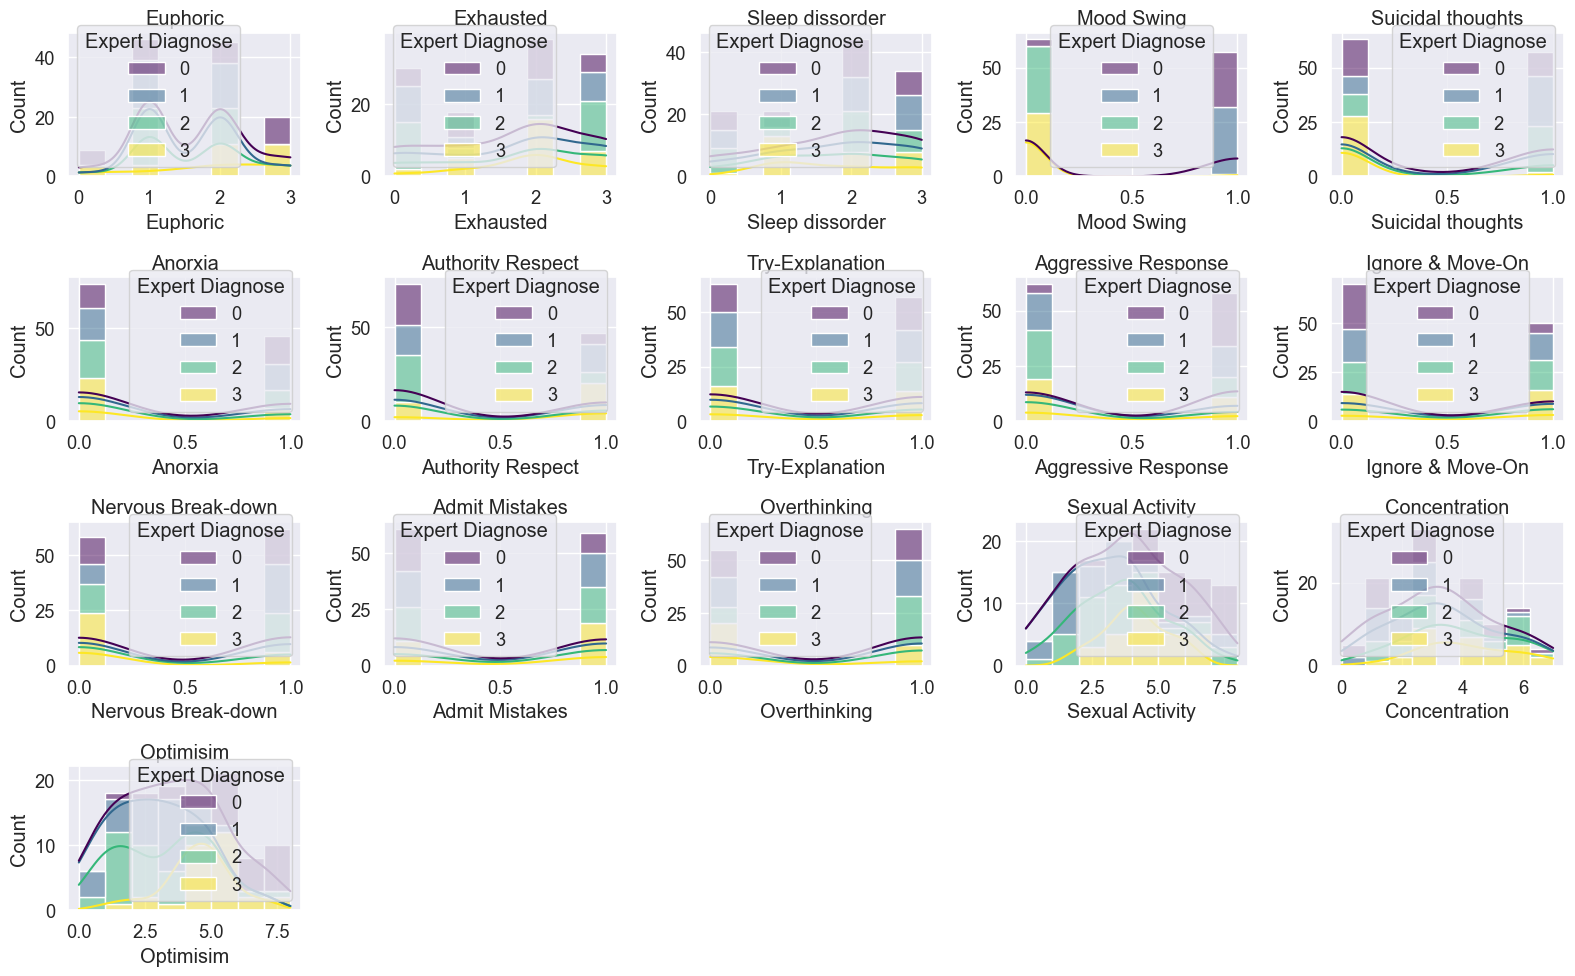

In [29]:
#Visualizing the distribution of symptoms for each disorder
plt.figure(figsize=(16, 10))
for symptom in df.columns[1:-1]:  
    plt.subplot(4, 5, df.columns.get_loc(symptom))
    sns.histplot(data=df, x=symptom, hue='Expert Diagnose', multiple="stack", kde=True, palette="viridis")
    plt.title(symptom)

plt.tight_layout()
plt.show()

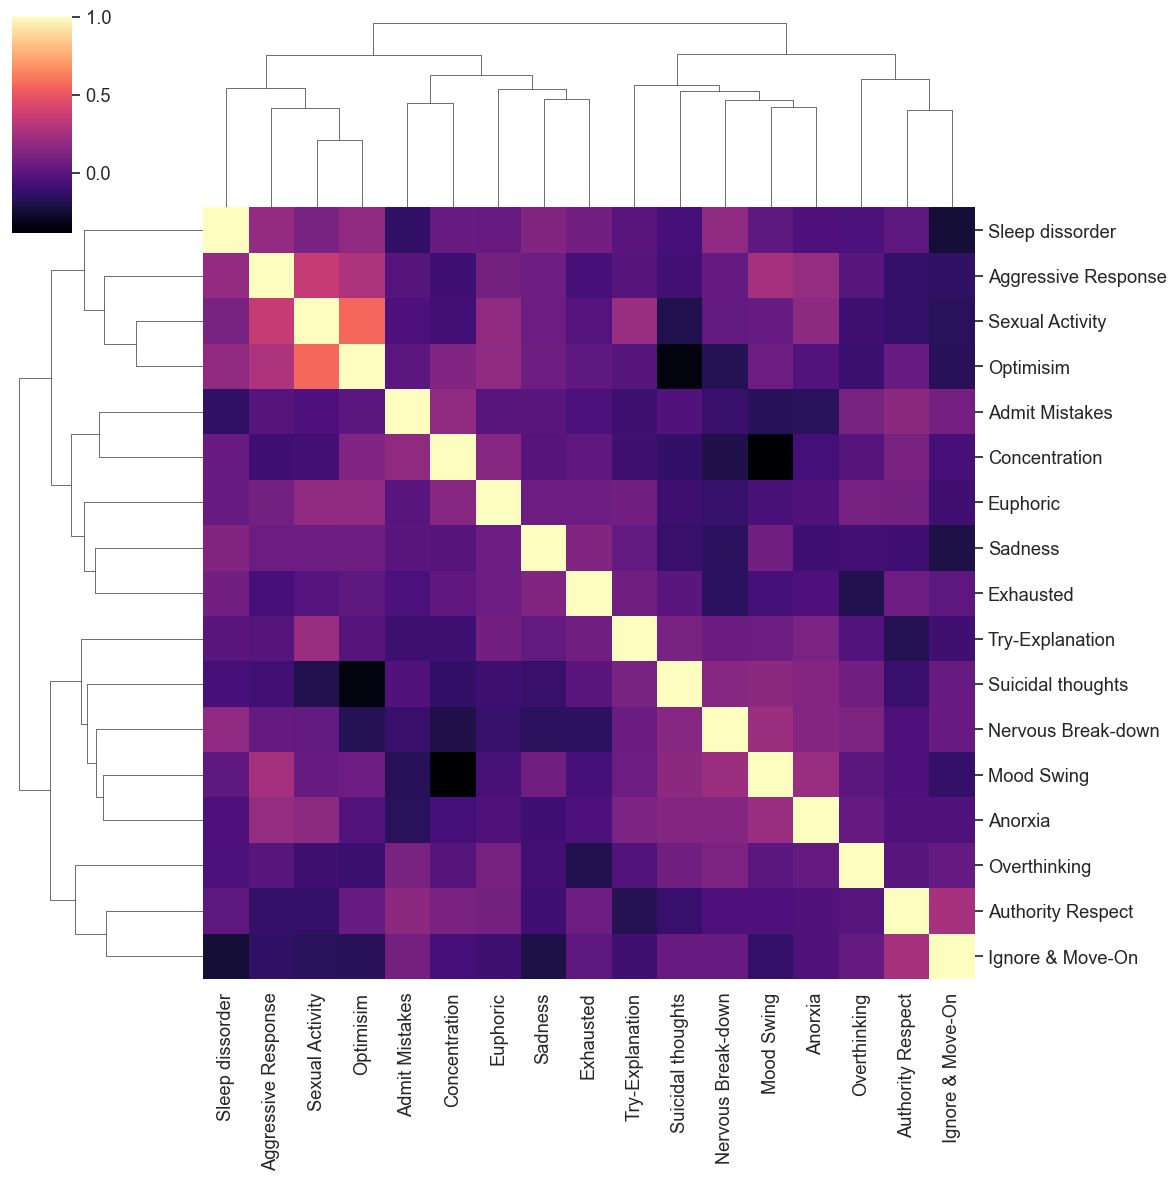

In [30]:
#Creating a clustermap
sns.set(font_scale=1.2)
clustermap = sns.clustermap(df.drop('Expert Diagnose', axis=1).corr(), cmap='magma', method='complete', figsize=(12, 12))
plt.show()


<a id="five"></a>
# 5. Data Processing
<a href=#cont>Back to Table of Contents</a>

In [31]:
#Performing a train-test split
from sklearn.model_selection import train_test_split

X = df.drop('Expert Diagnose', axis=1)
y = df['Expert Diagnose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

In [32]:
#Resampling dataset
from imblearn.over_sampling import RandomOverSampler

smote = RandomOverSampler()
X_train, y_train = smote.fit_resample(X_train, y_train)

Ensure that the training set remains unchanged.

In [36]:
X_train, y_train

(     Sadness  Euphoric  Exhausted  Sleep dissorder  Mood Swing  \
 0          2         1          3                2           0   
 1          3         1          2                2           1   
 2          1         3          3                3           1   
 3          3         1          2                2           1   
 4          3         2          0                2           1   
 ..       ...       ...        ...              ...         ...   
 103        0         2          3                2           1   
 104        3         1          0                2           1   
 105        2         2          3                0           1   
 106        2         2          2                2           1   
 107        0         1          2                3           1   
 
      Suicidal thoughts  Anorxia  Authority Respect  Try-Explanation  \
 0                    0        0                  1                0   
 1                    1        0                  


<a id="six"></a>
# 6. Modelling
<a href=#cont>Back to Table of Contents</a>

In [37]:
#Initiating RandomSearchCV & RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_classifier = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(rf_classifier, param_distributions=rf_param_grid, n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=67)
rf_random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=67, scoring='accuracy')

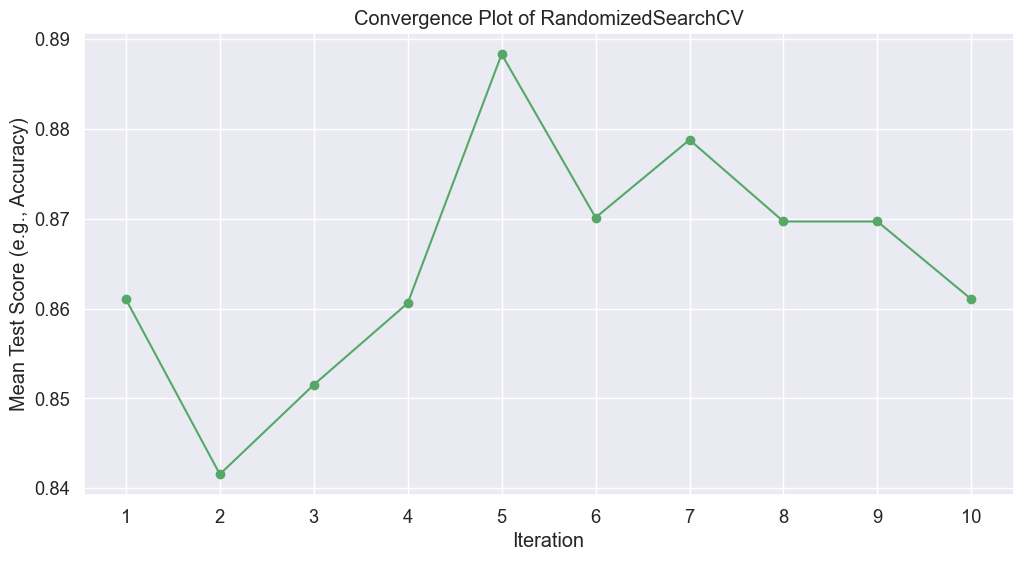

In [38]:
#Plotting the convergence of hyperparameter tuning
mean_test_scores = rf_random_search.cv_results_['mean_test_score']
params = rf_random_search.cv_results_['params']
n_iterations = len(mean_test_scores)

plt.figure(figsize=(12, 6))
plt.plot(range(1, n_iterations + 1), mean_test_scores, marker='o', linestyle='-', color='g')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score (e.g., Accuracy)')
plt.title('Convergence Plot of RandomizedSearchCV')
plt.xticks(np.arange(1, n_iterations + 1))
plt.grid(True)
plt.show()


<a id="six"></a>
# 7. Model Performance
<a href=#cont>Back to Table of Contents</a>

In [39]:
#Importing package for model assessment
from sklearn.metrics import classification_report, accuracy_score

best_rf_model = rf_random_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Classifier:\n\nBest Hyperparameters: {rf_random_search.best_params_}")
print(f"\nAccuracy: {accuracy_rf:.4f}\n\nClassification Report:\n{report_rf}")

Random Forest Classifier:

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}

Accuracy: 0.9167

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.92      0.96        12
           2       1.00      0.75      0.86         4
           3       0.75      1.00      0.86         3

    accuracy                           0.92        24
   macro avg       0.90      0.92      0.89        24
weighted avg       0.93      0.92      0.92        24



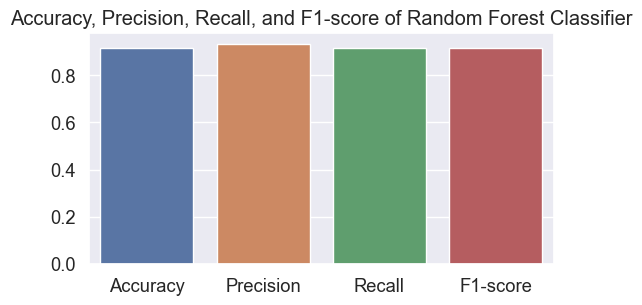

In [40]:
#Visualizing the models performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(6, 3))
sns.barplot(x=metrics, y=values)
plt.title('Accuracy, Precision, Recall, and F1-score of Random Forest Classifier')
plt.show()

- As displayed above the model exhibits exceptional performance

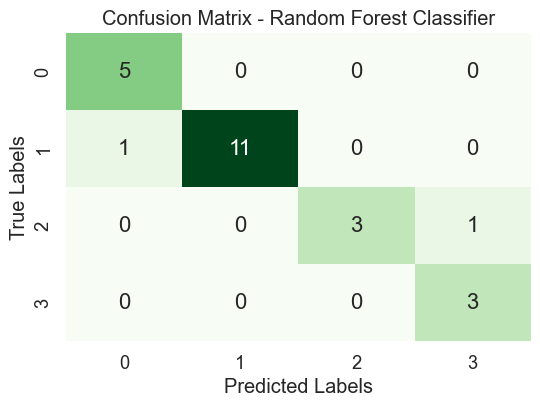

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()